**Realizado por:**


*   Laura Sofia Guio Camargo
*   Laura Michel Bolivar Rincon 

#BankCustomerData

##Importar librerías

In [ ]:
#Preparación de datos
import pandas as pd
import numpy as np
import io
#Gráficas
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#Preprocesamiento de datos y modelado
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

##Importar datos

In [ ]:
from google.colab import files
datos = files.upload()

Saving BankCustomerData.csv to BankCustomerData.csv


In [ ]:
BankData = pd.read_csv(io.BytesIO(datos['BankCustomerData.csv']))
BankData

age           job  marital  ... previous poutcome  term_deposit
0       58    management  married  ...        0  unknown            no
1       44    technician   single  ...        0  unknown            no
2       33  entrepreneur  married  ...        0  unknown            no
3       47   blue-collar  married  ...        0  unknown            no
4       33       unknown   single  ...        0  unknown            no
...    ...           ...      ...  ...      ...      ...           ...
42634   21       student   single  ...        1  success           yes
42635   87       retired  married  ...        0  unknown           yes
42636   34   blue-collar  married  ...        1    other            no
42637   22       student   single  ...        0  unknown           yes
42638   32    management   single  ...        0  unknown            no

[42639 rows x 17 columns]

##Limpiar y preparar datos

###Tipos de datos

In [ ]:
BankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           42639 non-null  int64 
 1   job           42639 non-null  object
 2   marital       42639 non-null  object
 3   education     42639 non-null  object
 4   default       42639 non-null  object
 5   balance       42639 non-null  int64 
 6   housing       42639 non-null  object
 7   loan          42639 non-null  object
 8   contact       42639 non-null  object
 9   day           42639 non-null  int64 
 10  month         42639 non-null  object
 11  duration      42639 non-null  int64 
 12  campaign      42639 non-null  int64 
 13  pdays         42639 non-null  int64 
 14  previous      42639 non-null  int64 
 15  poutcome      42639 non-null  object
 16  term_deposit  42639 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.5+ MB


###Convertir datos categóricos a numéricos

In [ ]:
from sklearn import preprocessing
le =preprocessing.LabelEncoder()

In [ ]:
valJob = BankData["job"].unique()
valMarital = BankData["marital"].unique()
valEdu = BankData["education"].unique()
valDef = BankData["default"].unique()
valHousing = BankData["housing"].unique()
valLoan = BankData["loan"].unique()
valContact = BankData["contact"].unique()
valMonth = BankData["month"].unique()
valPoutcome = BankData["poutcome"].unique()
valTermDeposit = BankData["term_deposit"].unique()

In [ ]:
BankData['job']=le.fit_transform(BankData['job'])
BankData['marital'] = le.fit_transform(BankData['marital'])
BankData['education'] = le.fit_transform(BankData['education'])
BankData['default'] = le.fit_transform(BankData['default'])
BankData['housing'] = le.fit_transform(BankData['housing'])
BankData['loan'] = le.fit_transform(BankData['loan'])
BankData['contact'] = le.fit_transform(BankData['contact'])
BankData['month'] = le.fit_transform(BankData['month'])
BankData['poutcome'] = le.fit_transform(BankData['poutcome'])
BankData['term_deposit'] = le.fit_transform(BankData['term_deposit'])

In [ ]:
#Diccionario por cada variable modificada
job=dict(zip((BankData['job'].unique()),valJob))
marital=dict(zip((BankData['marital'].unique()),valMarital))
education=dict(zip((BankData['education'].unique()),valEdu))
default=dict(zip((BankData['default'].unique()),valDef))
housing=dict(zip((BankData['housing'].unique()),valHousing))
loan=dict(zip((BankData['loan'].unique()),valLoan))
contact=dict(zip((BankData['contact'].unique()),valContact))
month=dict(zip((BankData['month'].unique()),valMonth))
poutcome=dict(zip((BankData['poutcome'].unique()),valPoutcome))
term_deposit=dict(zip((BankData['term_deposit'].unique()),valTermDeposit))

In [ ]:
BankData.head()

age  job  marital  education  ...  pdays  previous  poutcome  term_deposit
0   58    4        1          2  ...     -1         0         3             0
1   44    9        2          1  ...     -1         0         3             0
2   33    2        1          1  ...     -1         0         3             0
3   47    1        1          3  ...     -1         0         3             0
4   33   11        2          3  ...     -1         0         3             0

[5 rows x 17 columns]

###Estadísticas

In [ ]:
BankData.describe()

age           job  ...      poutcome  term_deposit
count  42639.000000  42639.000000  ...  42639.000000  42639.000000
mean      40.788808      4.305823  ...      2.610380      0.092896
std       10.200236      3.277115  ...      0.953935      0.290290
min       18.000000      0.000000  ...      0.000000      0.000000
25%       33.000000      1.000000  ...      3.000000      0.000000
50%       39.000000      4.000000  ...      3.000000      0.000000
75%       48.000000      7.000000  ...      3.000000      0.000000
max       95.000000     11.000000  ...      3.000000      1.000000

[8 rows x 17 columns]

###Verificamos si existen datos nulos

In [ ]:
BankData.isna().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
term_deposit    0
dtype: int64

##Gráficas de correlación

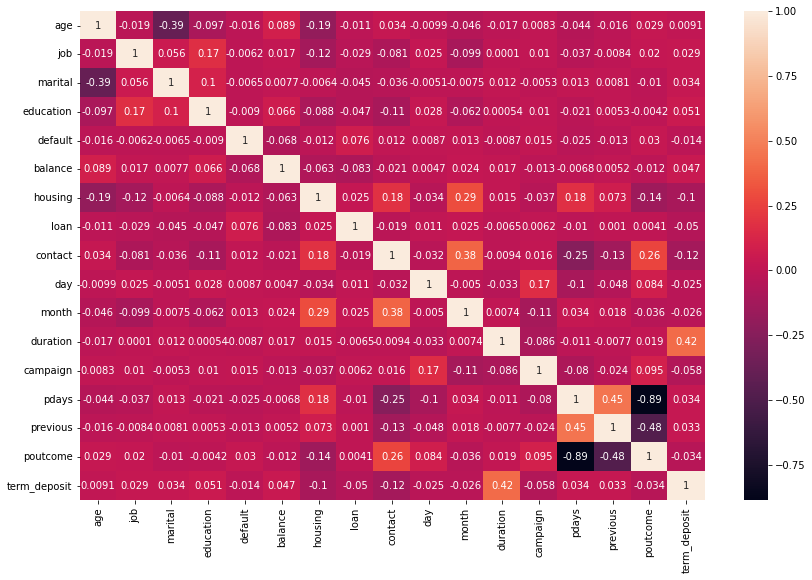

In [ ]:
corr_df = BankData.corr(method='pearson')

plt.figure(figsize=(14, 9))
sns.heatmap(corr_df, annot=True)
plt.show()

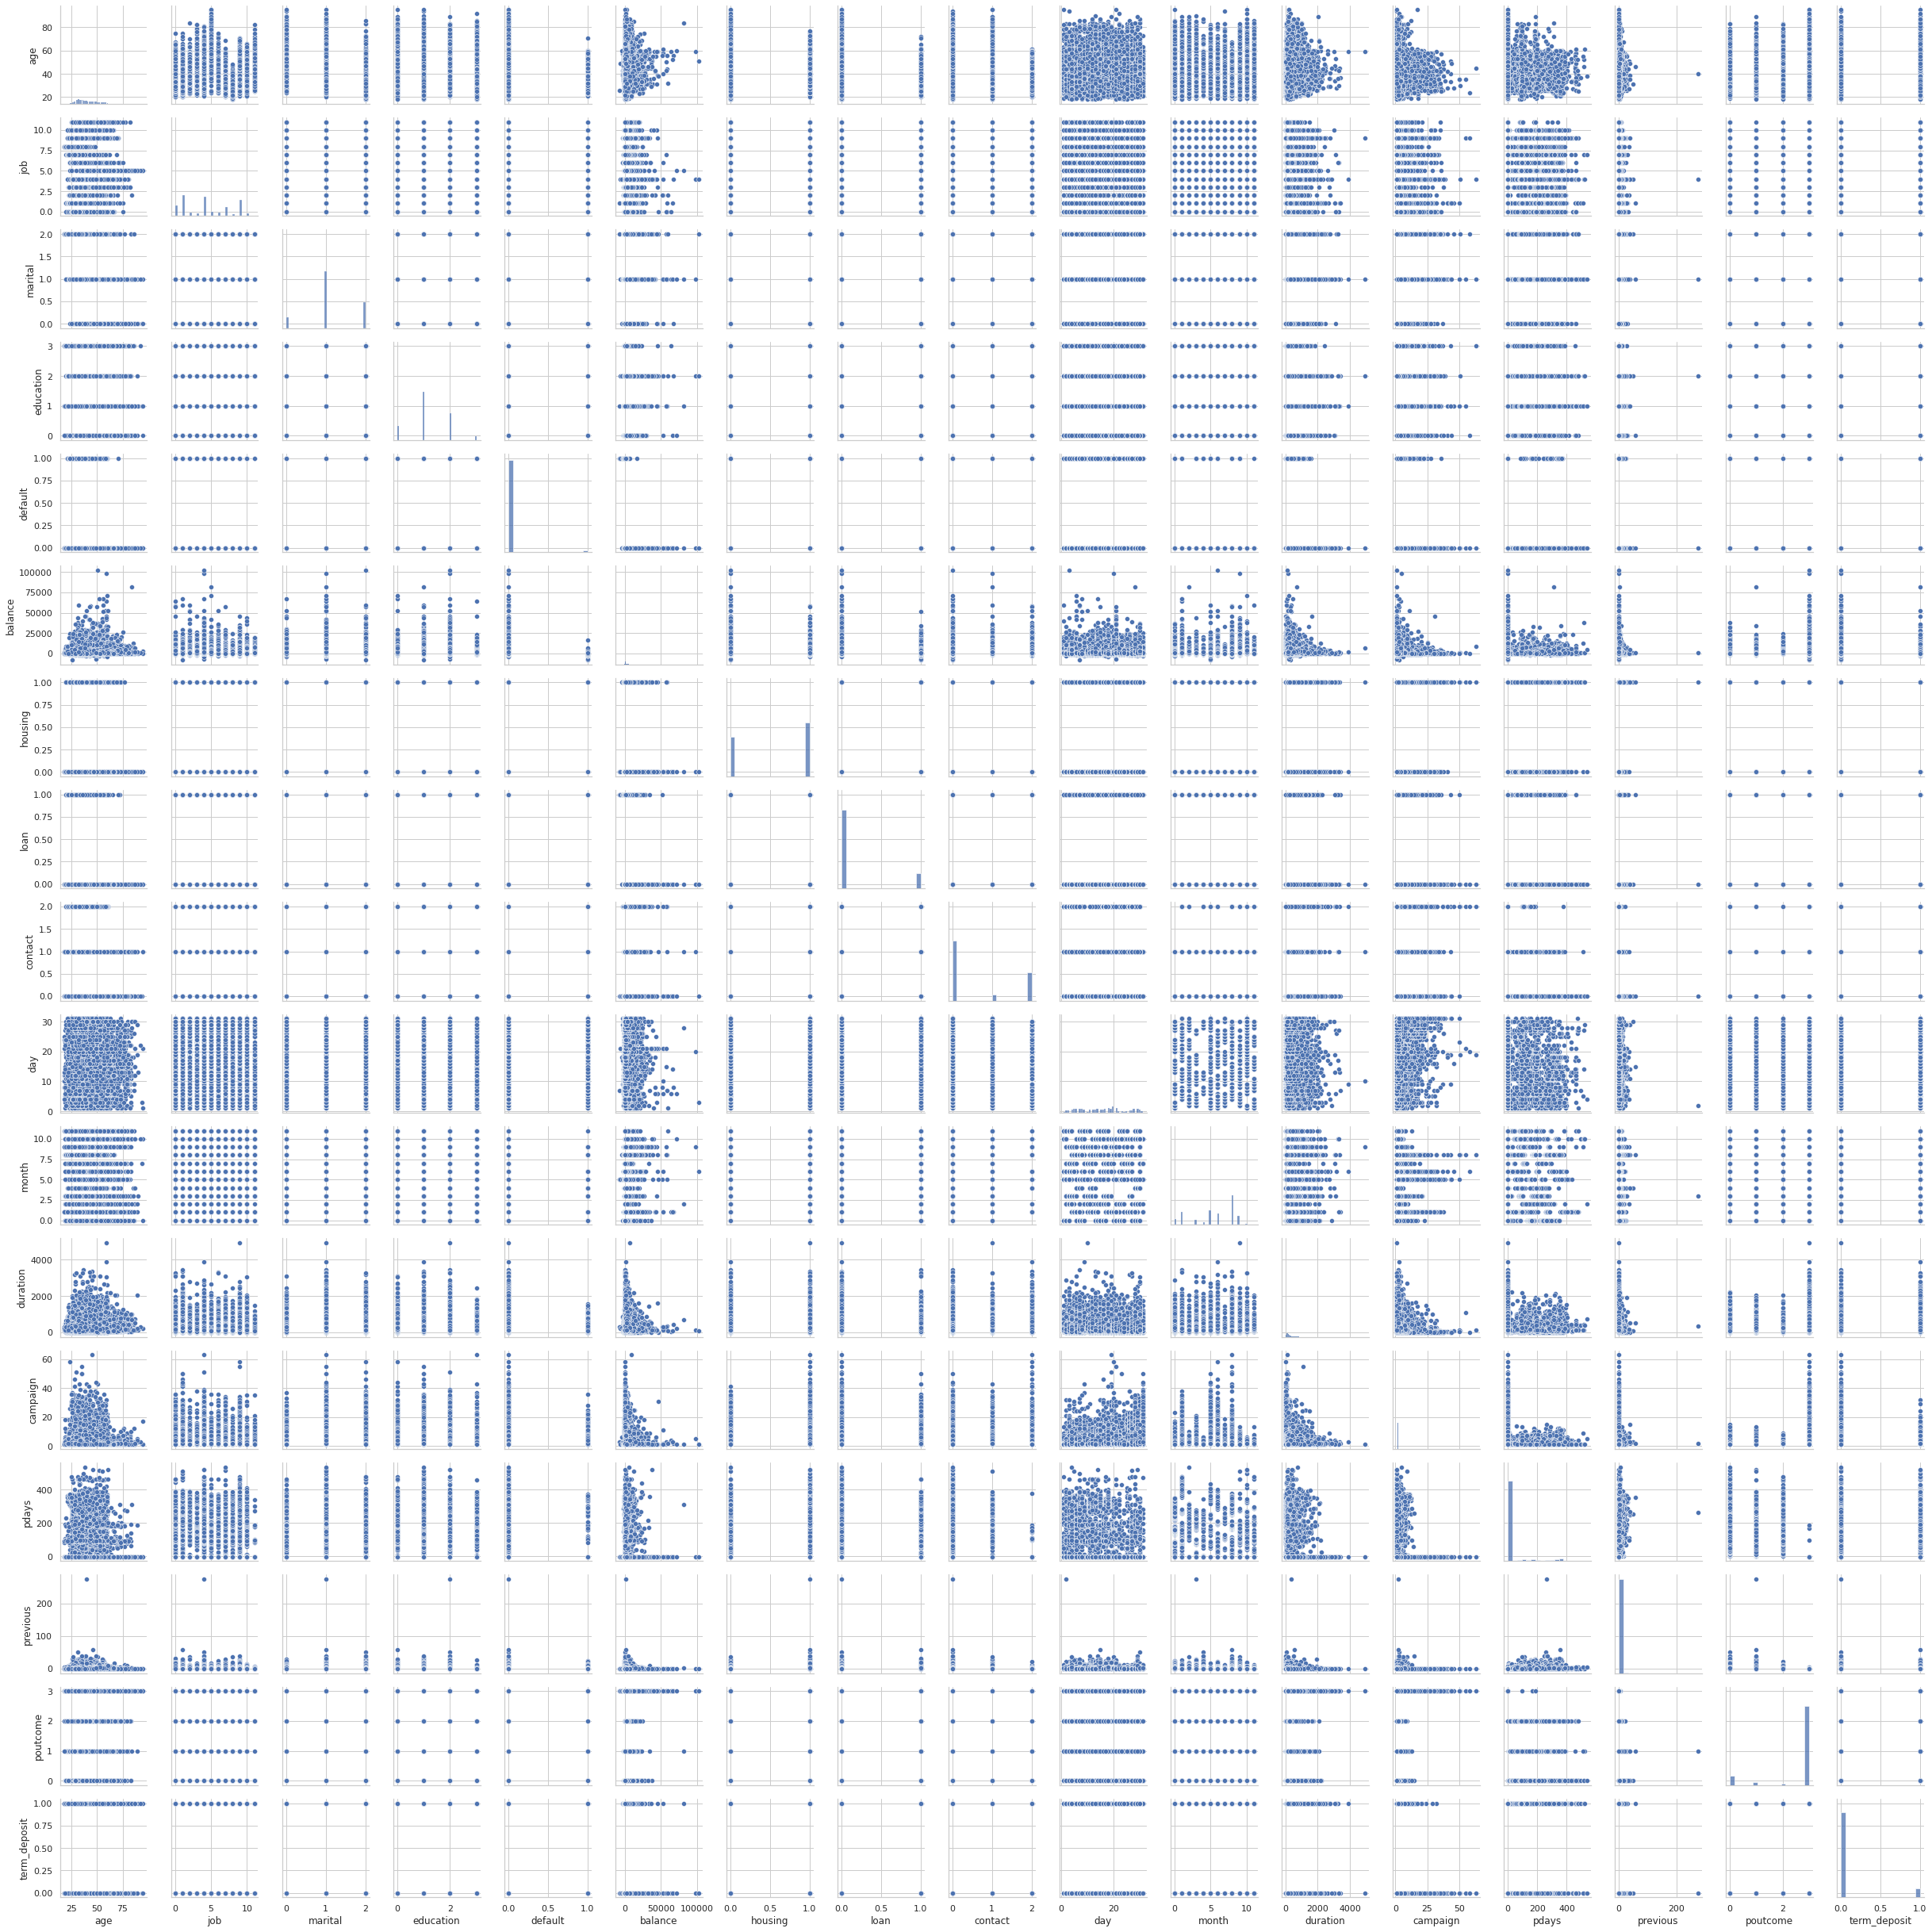

In [ ]:
sns.set(style='whitegrid', context='notebook')
features_plot = BankData.columns
sns.pairplot(BankData[features_plot], height=2.0);
plt.tight_layout()
plt.show()

term_deposit - Si VS No

In [ ]:
term_deposit

{0: 'no', 1: 'yes'}

Text(0.5, 1.0, 'Acepta VS No Acepta')

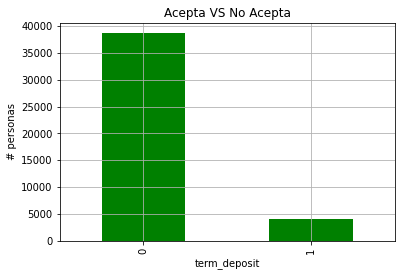

In [ ]:
terDep = BankData.groupby(['term_deposit']).size()
terDep.plot.bar(color='green').grid(True)
plt.ylabel("# personas")
plt.title("Acepta VS No Acepta")

Uno de los conjuntos de variables que mayor correlación tiene es term-deposit y duration, así que los graficamos

Text(0.5, 1.0, 'Acepta según duración')

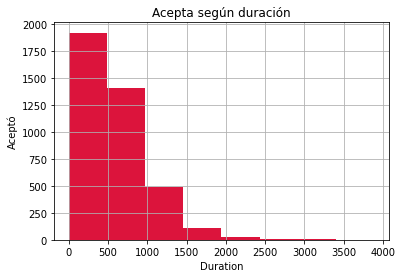

In [ ]:
term_dur = BankData.duration[BankData.term_deposit==1]
term_dur.plot(kind="hist", color="crimson",bins=8).grid(True)
plt.xlabel("Duration")
plt.ylabel("Aceptó")
plt.title("Acepta según duración")

Teniendo en cuenta la profesión

In [ ]:
job

{0: 'admin.',
 1: 'blue-collar',
 2: 'entrepreneur',
 3: 'housemaid',
 4: 'management',
 5: 'retired',
 6: 'self-employed',
 7: 'services',
 8: 'student',
 9: 'technician',
 10: 'unemployed',
 11: 'unknown'}

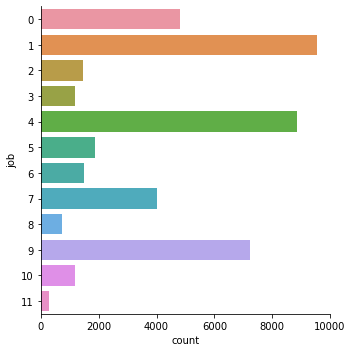

In [ ]:
g = sns.catplot(y="job",
                data=BankData,
                kind="count")

Teniendo en cuenta la gráfica se puede evidenciar que el trabajo más concurrente es "blue-collar" seguido de "management" y "technician"

Teniendo en cuenta estado civil "marital"

In [ ]:
marital

{0: 'divorced', 1: 'married', 2: 'single'}

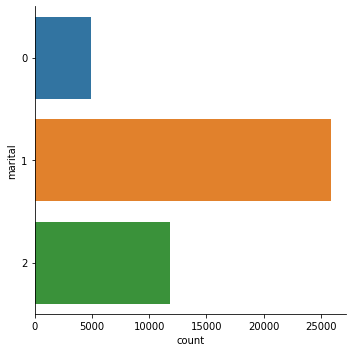

In [ ]:
g = sns.catplot(y="marital",
                data=BankData,
                kind="count")

Se puede evidenciar que hay un mayor número de personas casadas

Teniendo en cuenta educación "education"

In [ ]:
education

{0: 'primary', 1: 'secondary', 2: 'tertiary', 3: 'unknown'}

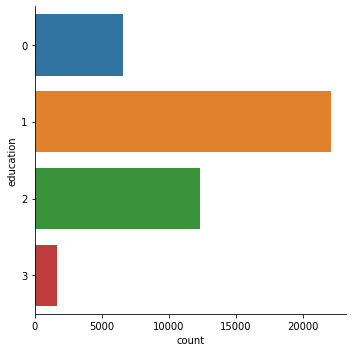

In [ ]:
g = sns.catplot(y="education",
                data=BankData,
                kind="count")

La mayor parte de la muestra terminó sus estudios secundarios "secondary"

Teniendo en cuenta el mes

In [ ]:
month

{0: 'apr',
 1: 'aug',
 2: 'dec',
 3: 'feb',
 4: 'jan',
 5: 'jul',
 6: 'jun',
 7: 'mar',
 8: 'may',
 9: 'nov',
 10: 'oct',
 11: 'sep'}

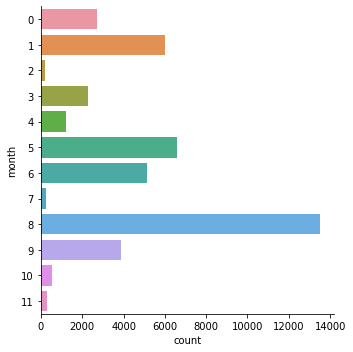

In [ ]:
g = sns.catplot(y="month",
                data=BankData,
                kind="count")

El mes que presenta más actividad es Mayo

Teniendo en cuenta "housing"

In [ ]:
housing

{0: 'no', 1: 'yes'}

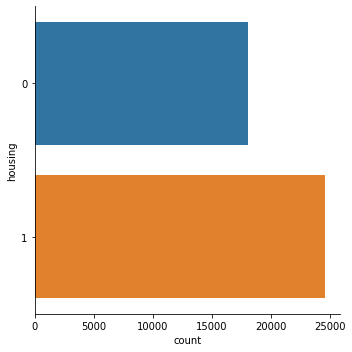

In [ ]:
g = sns.catplot(y="housing",
                data=BankData,
                kind="count")

La mayor parte de la muestra tiene casa

##Modelos de ML

###Regresión logística

Importar librerías faltantes

In [ ]:
from sklearn.linear_model import LogisticRegression

Dividir datos y etiquetas

In [ ]:
x = BankData.drop(columns='term_deposit')
y = BankData['term_deposit']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

Aplicar regresión logística

In [ ]:
modelo = LogisticRegression(max_iter=4000)
modelo.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=4000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predicciones

In [ ]:
y_pred=modelo.predict(x_test)
regLog = modelo.score(x_train,y_train)
regLogPru = modelo.score(x_test,y_test)
print('Precisión por regresión logística: ', regLog)
print('Precisión predicciones: ', regLogPru)

Precisión por regresión logística:  0.9137814781155639
Precisión predicciones:  0.9084193245778611


[[7603  131]
 [ 650  144]]


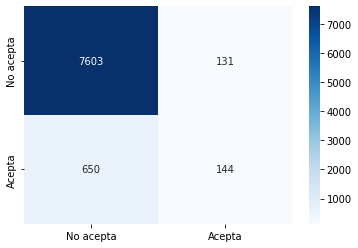

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
group_names=['True Neg','False pos','False Neg','True pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages=["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
class_names = ['No acepta', 'Acepta']
dataframe =  pd.DataFrame(cm, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, fmt='', cmap='Blues')

###Árboles de decisión

Instanciar

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelo2 = DecisionTreeClassifier()

Probar distintas profundidades

In [ ]:
prof_list=list(range(1,30))

accuracy_list=[]

for profundidad in prof_list:
  arbol=DecisionTreeClassifier(max_depth=profundidad, random_state=0)
  arbol.fit(x_train,y_train)
  score=arbol.score(x_test,y_test)
  accuracy_list.append(score)

<function matplotlib.pyplot.show>

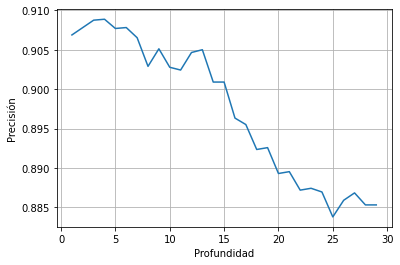

In [ ]:
plt.plot(prof_list,accuracy_list)
plt.ylabel("Precisión")
plt.xlabel("Profundidad")
plt.grid(True)
plt.show

La profundidad que mejores resultados da es la de 4 aproximadamente

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelo2 = DecisionTreeClassifier(max_depth=4)
modelo2.fit(x_train,y_train)
y_pred = modelo2.predict(x_test)
precAr = modelo2.score(x_train,y_train)
precArPru = modelo2.score(x_test,y_test)
print('Precisión árbol de decisión: ',precAr )
print('Precisión de las pruebas: ', precArPru)

Precisión árbol de decisión:  0.9165665034739526
Precisión de las pruebas:  0.9088883677298312


Graficar árbol de decisión

In [ ]:
from sklearn.tree import export_graphviz 
from pydotplus import graph_from_dot_data  

class_name_list = list(['No acepta','Acepta'])
dot_data = export_graphviz(arbol, feature_names=['age','job','marital','education','default',
                                                 'balance','housing','loan','contact','day',
                                                 'month','duration','campaign','pdays','previous',
                                                 'poutcome'], class_names=class_name_list)
grafico=graph_from_dot_data(dot_data)
grafico.write_png('arbol_Bank.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.257438 to fit



True

Visualizar características más importantes del modelo

In [ ]:
df_importancia = pd.DataFrame({"característica": x_train.columns, "Importancia":modelo2.feature_importances_})
df_importancia = df_importancia.sort_values("Importancia",ascending=False)
df_importancia.head()

característica  Importancia
11       duration     0.811359
10          month     0.111919
0             age     0.043716
8         contact     0.024474
2         marital     0.004464

Mostrar árbol obtenido

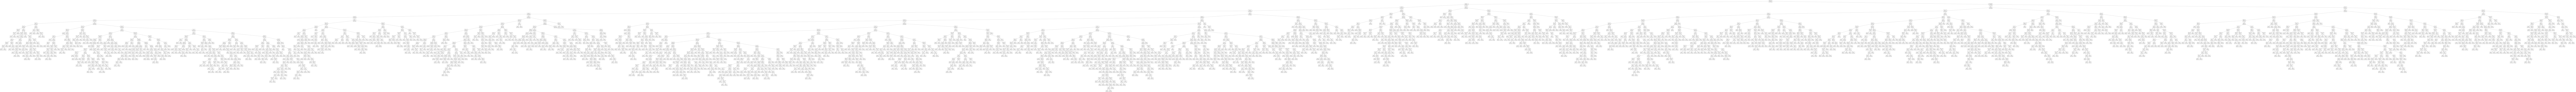

In [ ]:
#Para mostrar el árbol
from PIL import Image
import IPython.display as display
display.display(Image.open('arbol_Bank.png'))

[[7732    2]
 [ 786    8]]


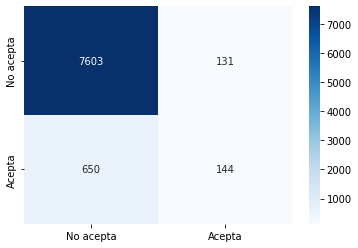

In [ ]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test,y_pred)
print(matriz)
group_names=['True Neg','False pos','False Neg','True pos']
group_counts = ["{0:0.0f}".format(value) for value in matriz.flatten()]
group_percentages=["{0:.2%}".format(value) for value in matriz.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
class_names = ['No acepta', 'Acepta']
dataframe =  pd.DataFrame(cm, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, fmt='', cmap='Blues')

###Support Vector Machine

In [ ]:
from sklearn.svm import SVC
modelo3 = SVC()
modelo3.fit(x_train,y_train)
y_pred = modelo3.predict(x_test)
svmPreTra = modelo3.score(x_train,y_train)
svmPreTes = modelo3.score(x_test,y_test)
print('Precisión de Support Vector Machine: ', svmPreTra)
print('Precisión pruebas de Support Vector Machine: ', svmPreTes)

Precisión de Support Vector Machine:  0.9072439975374512
Precisión pruebas de Support Vector Machine:  0.9075984990619137


[[7732    2]
 [ 786    8]]


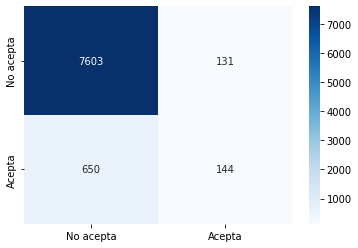

In [ ]:
from sklearn.metrics import confusion_matrix
matriz3 = confusion_matrix(y_test,y_pred)
print(matriz)
group_names=['True Neg','False pos','False Neg','True pos']
group_counts = ["{0:0.0f}".format(value) for value in matriz3.flatten()]
group_percentages=["{0:.2%}".format(value) for value in matriz3.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
class_names = ['No acepta', 'Acepta']
dataframe =  pd.DataFrame(cm, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, fmt='', cmap='Blues')

###KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelo4 = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p=2)
modelo4.fit(x_train,y_train)
y_pred = modelo4.predict(x_test)
knnPrec = modelo4.score(x_train,y_train)
knnPrecPru = modelo4.score(x_test,y_test)
print('Precisión por Vecino más cercano: ',knnPrec)
print('Precisión de pruebas por Vecino más cercano: ',knnPrecPru)

Precisión por Vecino más cercano:  0.9357098883058251
Precisión de pruebas por Vecino más cercano:  0.8977485928705441


[[7732    2]
 [ 786    8]]


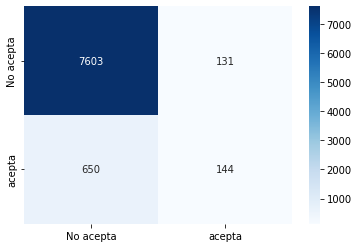

In [ ]:
from sklearn.metrics import confusion_matrix
matriz4 = confusion_matrix(y_test,y_pred)
print(matriz)
group_names=['True Neg','False pos','False Neg','True pos']
group_counts = ["{0:0.0f}".format(value) for value in matriz4.flatten()]
group_percentages=["{0:.2%}".format(value) for value in matriz4.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
class_names = ['No acepta', 'acepta']
dataframe =  pd.DataFrame(cm, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, fmt='', cmap='Blues')

##Comparar las precisiones de entrenamiento y de pruebas

In [ ]:
ListasRes = [['Reg logística', regLog, regLogPru], ['Árboles de dec', precAr, precArPru],
             ['SVM', svmPreTra, svmPreTes], ['KNN', knnPrec, knnPrecPru]]

Tabla = """\
+---------------------------------------------------------------------------+
| Algoritmo          Precisión Entrenamiento        Precisión pruebas       |
|---------------------------------------------------------------------------|
{}
+---------------------------------------------------------------------------+\
"""
Tabla = (Tabla.format('\n'.join("| {:<18} {:>8} {:>30}      |".format(*fila)
 for fila in ListasRes)))
print (Tabla)

+---------------------------------------------------------------------------+
| Algoritmo          Precisión Entrenamiento        Precisión pruebas       |
|---------------------------------------------------------------------------|
| Reg logística      0.9137814781155639             0.9084193245778611      |
| Árboles de dec     0.9165665034739526             0.9088883677298312      |
| SVM                0.9072439975374512             0.9075984990619137      |
| KNN                0.9357098883058251             0.8977485928705441      |
+---------------------------------------------------------------------------+


##Conclusiones

*   Teniendo en cuenta los resultados obtenidos, ninguno presenta sobreajuste ya que la precisión presentada en el entrenamiento y en las pruebas es cercana.

*   En cuanto el modelo de regresión logística, una de las variables que fue modificada es "max_iter" ya que si se dejaba por default "max_iter=1000" se presentaba un overfitting. Además su precisión, tanto en entrenamiento como en pruebas, fue alta. 

* Para tener un mejor resultado en el modelo de árboles de decisión, se optó por una profundidad de 4 "max_depth = 4" ya que este arrojaba las mejores precisiones. Sin embargo, esto llevó a que fuera una proceso extenso (evidenciado en su gráfica) 

* Al efectuar la predicción en el modelo de Support Vector Machine se puede evidenciar que hay mayor precisión en las pruebas que en su entrenamiento. 

* Analizando el modelo de KNN se puede notar que fue la mejor precisión en cuanto a entrnamiento se refiere, sin embargo la precisión de sus pruebas fue la más baja. 

* Ordenando los modelos según su precisión, tanto en entrenamiento como en pruebas, se pueden ordenar de la siguiente manera: 
  1. Árboles de decisión
  2. Regresión logística
  3. SVM
  4. KNN

